# Introduction

Swapping two numbers and other problems built on top of it are the introductory problems introduced at the beginning of any programming course. In this notebook, we shall try to develop a simple Quantum Circuit that can be used to exchange two digits. The Circuit used is simple to understand and anyone, with no background in Quantum Computing, can also understand the circuit.

**Prerequisites**

* Basic Python

**Dependencies for this Notebook**

* python

* numpy

* qiskit

* pylatexenc

# What is Qiskit?

[Qiskit](https://qiskit.org/) is an open-source framework for Quantum Computing. It provides tools for creating and manipulating quantum programs and running them on prototype quantum devices on IBM Q Experience or on simulators on a local computer.

The version of Qiskit that we will be using is based on Python. The Swift and Javascript Versions of Qiskit are also in Development

Essentially, we will be building a Quantum Circuit that works on Qubits (Quantum Analogue of Classical bits).

# Quantum Gates

Quantum Gates are the most important part of a Quantum Circuit. We manipulate the state of Qubits by applying Quantum Gates on them. This is similar to a Classical Circuit where we use Classical Gates like AND, OR, NOT, NAND, etc. for the purpose of manipulation. Some of the Quantum Gates have a classical analogue (like Quantum NOT Gate) and some are completely new gates with no classical analogues.

In the Circuit for Swapping Two Numbers, we will be using:
* NOT Gate

Note that there are various other more complicated Circuits that make use of other gates like Hadamard Gate to accomplish the same task precisely. However, in this notebook, we will try to keep things simple by using NOT Gate(since it is a very easy to understand Quantum Gate).


**NOT Gate:**

The NOT Gate is one of the most simple-to-understand gates in Quantum Circuits. It is the Quantum Analogue of the Classical NOT Gate. It operates on one Qubit. The function of the Quantum NOT Gate is very similar to the classical NOT Gate. A Classical NOT Gate simply flips the state of a bit from 0 to 1 or from 1 to 0. Similarly, the Quantum NOT Gate flips the state of a qubit from **|0>** to **|1>** or from **|1>** to **|0>**.

Here, **"|>"** are a part of Dirac Notation and they distiguish the state of a Qubit from the state of a classical bit. They are pronounced as 'Ket'. For eg: |0> can be read out as "Ket Zero" or "Ket of Zero". As we know, the classical bit can take the values of either 0 or 1. Similarly, the Qubits can take either the state |0> or the state |1> or both at the same time(this is just a linear combination of these two states, popularly known as the concept of Superposition)

Also, it is important to note that |0> and |1> are both 2X1 Vectors and not a scalar value.

In [1]:
import numpy as np
zero_state = np.array([[1],[0]])
one_state = np.array([[0],[1]])

In [2]:
print("The |0> is \n", zero_state)
print("The |1> is \n", one_state)

The |0> is 
 [[1]
 [0]]
The |1> is 
 [[0]
 [1]]


In [3]:
print("The shape of the Vector |0> is",zero_state.shape)
print("The shape of the Vector |1> is",one_state.shape)

The shape of the Vector |0> is (2, 1)
The shape of the Vector |1> is (2, 1)


* At this point, a good question can be why is |0> equal to [[1],[0]]?

The Question has a simple answer. There are two possible states |0> and |1>(after the measurement). The value 1 on the first place indicates that it's the state zero. Similarly, in the state |1>, the value 1 is on the second position, indicating the state one. This is similar to the concept of **One-Hot Encoding**.

# Quantum Circuits for Swapping Two Numbers

For the viewers who are completely new to Python, let me first demonstrate the swapping of two integers using Python! It's Super Simple!

In [4]:
#Getting the user input int values for two numbers
num1 = int(input("Enter a value for Number One! \n")) 
num2 = int(input("Enter a value for Number Two! \n")) 

Enter a value for Number One! 
4
Enter a value for Number Two! 
2


In [5]:
num1, num2 = num2, num1 #Swapping

In [6]:
print("The value of Number 1 after swapping: ",num1)
print("The value of Number 2 after swapping: ",num2)

The value of Number 1 after swapping:  2
The value of Number 2 after swapping:  4


The Swapping is Done!

This is the reason we say Python is Super Simple!

Some programmers do not consider such type of swapping as a "valid swapping", instead they stress on the use of a temporary variable for the swapping of two numbers. If you have learnt languages like C, you can understand the use of temporary variable easily!

Now, let's get into the Quantum Stuff!

**Steps to build the Quantum Circuit:**

* Take the Inputs from the User

* Convert the inputs to their Binary Equivalent

* Preprocessing

* Build the Quantum Circuit


In the demonstration, we use single digit numbers to limit the number of qubits 

**1. Take the User Input**

In [7]:
#Getting the user input int values for two numbers
num1 = int(input("Enter a value for Number One! \n")) 
num2 = int(input("Enter a value for Number Two! \n")) 

Enter a value for Number One! 
4
Enter a value for Number Two! 
2


**2. Convert the input to binary equivalent**

Let's define a method that takes a int input and return its binary equivalent in the form of a list of strings. We shall call this method 'cvtb' that stands for convert to binary.

In [8]:
def cvtb(num):
  binnum = [int(i) for i in list('{0:0b}'.format(num))]
  return binnum

Let's break down the above code block!

* The Method **cvtb** takes an integer value 'num'.

* '{0:0b}'.format(num) - Here using the format function we convert the number into its binary equivalent. Notice 'b' in '0:0b' which stands for the binary conversion. Similarly, using tother notations, conversion to other formats like octal, hex etc. 

* Now we convert this conversion into a list and using the list comprehension technique, we convert the string to int format and save it as a list of integer values!

Note: You can also choose to return a list of strings, it won't make much difference!

The Next Three Code cells can help you to understand the explanation in the above block!

In [9]:
'{0:0b}'.format(4)

'100'

In [10]:
list('{0:0b}'.format(4))

['1', '0', '0']

In [11]:
[int(i) for i in list('{0:0b}'.format(4))]

[1, 0, 0]

**3. The Preprocessing**

In [12]:
#Calling the method "cvtb" and getting the binary equivalents of num1 and num2
num1_b = cvtb(num1)
num2_b = cvtb(num2)

In [13]:
#Getting the length of each list
num1_l = len(num1_b)
num2_l = len(num2_b)

#Adjusting the length of two lists 
if num1_l==num2_l:
  pass
elif num1_l < num2_l:
  diff = num2_l - num1_l #Getting the difference in the lengths
  for ind in range(diff):
    num1_b.insert(ind,0)#Adding zeroes to the left 
elif num2_l < num1_l:
  diff = num1_l - num2_l
  for ind in range(diff):
    num2_b.insert(ind,0)


In [14]:
print(num1_b)

[1, 0, 0]


In [15]:
print(num2_b)

[0, 1, 0]


In [16]:
#In this block, we check for the indices with the value 1 in the lists num1_b,
#num2_b, and store the indices in the corresponding list
indices_num1 = []
indices_num2 = []
for i in range(len(num2_b)):
  if num1_b[i]==1:
    indices_num1.append(i)
  if num2_b[i]==1:
    indices_num2.append(i)

Note that all the qubits have an initial state |0>. Therefore, it is important for us to know the index at the which the value is not zero. This is the reason for executing the above block. As we move into the next section, the reason to execute this step will become more clear.

In [17]:
#In this block, we check for the indices for which the values
#differ in both the lists
indices = []
for i in range(len(num2_b)):
  if num1_b[i]!=num2_b[i]:
    indices.append(i)

**4. The Quantum Circuit**

Before we can use qiskit, we need to install Qiskit. If you want to install qiskit on your local machine, you can go through this [video](https://www.youtube.com/watch?v=M4EkW4VwhcI).

In [18]:
!pip install qiskit #Install qiskit on colab
!pip install pylatexenc #Required for matplotlib support to render the images of circuit
from IPython.display import clear_output #Clear the output after installation
clear_output()

Any Quantum Circuit can be subdivided into the following three parts:

* Encoding the input into the Qubits

* Applying the necessary transformations

* Extracting the output 

**Step 1. Encoding the Input**

In [19]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, execute

In [20]:
n_qubits = len(num2_b)#Number of required qubits 
                      #equals to the length of num2_b or num1_b list
n_q1 = QuantumRegister(n_qubits,name='num1')
print(n_q1)
n_b1 = ClassicalRegister(n_qubits)
print(n_b1)

QuantumRegister(3, 'num1')
ClassicalRegister(3, 'c0')


The Concept of Registers is same like for the Classical Computers. With no surprise, QuantumRegister is the register for Qubits and ClassicalRegister is the register for bits. Also, note that we have used the parameter "name" for naming num1 and distinguishing it from num2. This will help us to clearly observe the swapping of the numbers without any confusion. The direct initialization using QuantumCircuit is possible too. The argument "name" is also available for QuantumCIrcuit class.

In [21]:
qnum1 = QuantumCircuit(n_q1, n_b1) #Initializing the Quantum Circuit
#For every index with a value one, we appply a NOT Gate 
#that transforms state |0> to |1>
for i in indices_num1:
  qnum1.x(i)

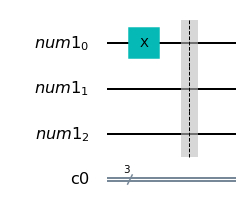

In [22]:
qnum1.barrier() #We will add a barrier for visual discrimination between the initial
                #encoding part and the transformation part
qnum1.draw('mpl') #Visualizing the Circuit qnum1

Now, we will repeat the same steps for the second number and built a circuit **qnum2**

In [23]:
n_q2 = QuantumRegister(n_qubits,name='num2')
n_b2 = ClassicalRegister(n_qubits)

In [24]:
qnum2 = QuantumCircuit(n_q2,n_b2)
for i in indices_num2:
  qnum2.x(i)

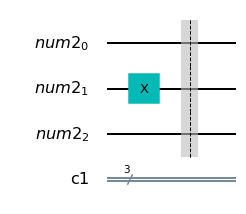

In [25]:
qnum2.barrier()
qnum2.draw('mpl')

**Step 2. Applying the Necessary Tansformations**

In [26]:
for i in indices:
  qnum1.x(i)
  qnum2.x(i)

The above block executes the main logic of the Circuit. Previously, we had stored the indices at which the values in num1_b and num2_b differed. Using these indices, stored in the list "indices", we perform a NOT on each of the index in both the circuits. This Simply transforms num1 into num2 and num2 into num1 and the swapping of the numbers take place! Therefore, the **qnum1** circuit holds the values of number two in its binary form and vice versa.

In [27]:
#Using barriers to distinguish transformation part from output extraction
qnum1.barrier()
qnum2.barrier()

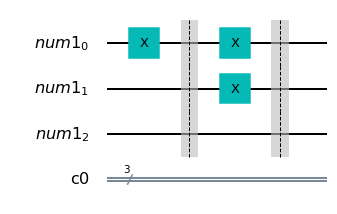

In [28]:
qnum1.draw('mpl')

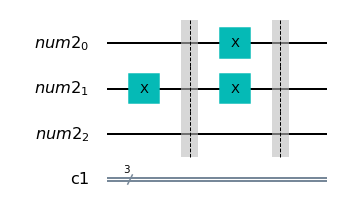

In [29]:
qnum2.draw('mpl')

**Step 3. Extracrting the output**

The only part of the circuit that we have not discussed yet is the **measurement**. 

The "Measurement" is also considered as an operation in Quantum Computing. In fact, a measurement is the only way to extract output from a qubit. Here, we extract the output from the qubits and store it in bits.

In [30]:
for i in range(3):
  qnum1.measure(i,i)
  qnum2.measure(i,i)

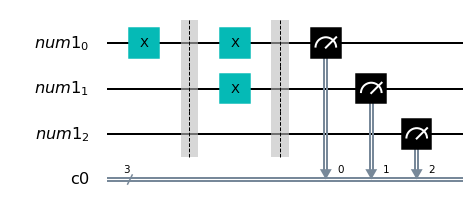

In [31]:
qnum1.draw('mpl')

In [32]:
#Using qasm_simulator, we can simulate our circuit on an actual quantum device
simulator = Aer.get_backend('qasm_simulator')

In [33]:
#Get the results for each simulation
result_num1 = execute(qnum1,backend=simulator).result().get_counts()

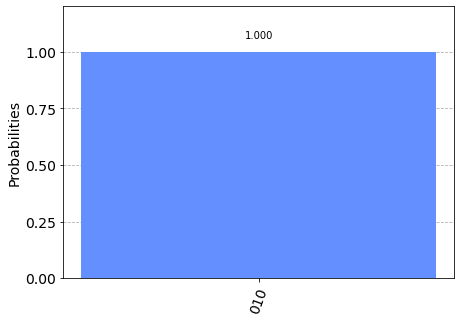

In [34]:
#Visualizing the results through a histogram
from qiskit.visualization import plot_histogram
plot_histogram(result_num1)

**Analyzing the Results:**

* Clearly, we get the results '010' (binary equivalent of number 2) with 100% Probability. The combination of zeroes and ones at the bottom represents the output of the bits.

* The number at the bottom, zero in this case, is the output of the bit c2 (the last bit). Therefore, the result should be read from top to bottom.

Now, let us check if we have got the number one in the circuit qnum2

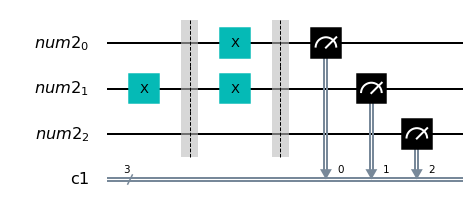

In [35]:
qnum2.draw('mpl')

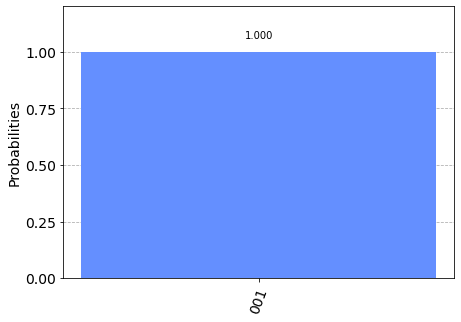

In [36]:
simulator = Aer.get_backend('qasm_simulator')
result_num2 = execute(qnum2,backend=simulator).result().get_counts()
plot_histogram(result_num2)

**Analyzing the results**

* Here, we get the result '100' (binary equivalent of 4) with 100% Probability.

* Therefore, we have successfully swapped the values the two numbers using qiskit!

# Conclusion

In this notebook, we learnt about the following qiskit components:

* **QuantumRegister**

* **ClassicalRegister**

* **QuantumCircuit**

* Using **NOT Gate** to flip the state of a Qubit

* Using **barrier()** to distinguish different parts of a Quantum Circuit

* Using **Aer** to get a backend

* Executing a Quantum Circuit through **execute**

* Analysis of Results through **plot_histogram**